# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

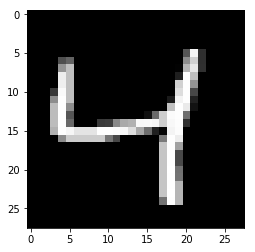

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [7]:
# mnist.train.images[0]

In [8]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_shape = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32,shape=(None,image_shape),name='inputs')
targets_ = tf.placeholder(tf.float32,shape=(None,image_shape),name='targets')

# Output of hidden layer
encoded = tf.layers.dense(inputs_,encoding_dim,activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded,image_shape) # linear activation
# Sigmoid output from logits
decoded = tf.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [9]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [10]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6942
Epoch: 1/20... Training loss: 0.6911
Epoch: 1/20... Training loss: 0.6882
Epoch: 1/20... Training loss: 0.6849
Epoch: 1/20... Training loss: 0.6804
Epoch: 1/20... Training loss: 0.6763
Epoch: 1/20... Training loss: 0.6672
Epoch: 1/20... Training loss: 0.6630
Epoch: 1/20... Training loss: 0.6552
Epoch: 1/20... Training loss: 0.6431
Epoch: 1/20... Training loss: 0.6314
Epoch: 1/20... Training loss: 0.6198
Epoch: 1/20... Training loss: 0.6063
Epoch: 1/20... Training loss: 0.5923
Epoch: 1/20... Training loss: 0.5765
Epoch: 1/20... Training loss: 0.5631
Epoch: 1/20... Training loss: 0.5464
Epoch: 1/20... Training loss: 0.5336
Epoch: 1/20... Training loss: 0.5082
Epoch: 1/20... Training loss: 0.4907
Epoch: 1/20... Training loss: 0.4706
Epoch: 1/20... Training loss: 0.4554
Epoch: 1/20... Training loss: 0.4406
Epoch: 1/20... Training loss: 0.4309
Epoch: 1/20... Training loss: 0.4143
Epoch: 1/20... Training loss: 0.3956
Epoch: 1/20... Training loss: 0.3840
E

Epoch: 1/20... Training loss: 0.2009
Epoch: 1/20... Training loss: 0.2151
Epoch: 1/20... Training loss: 0.2224
Epoch: 1/20... Training loss: 0.1994
Epoch: 1/20... Training loss: 0.2079
Epoch: 1/20... Training loss: 0.2085
Epoch: 1/20... Training loss: 0.2122
Epoch: 1/20... Training loss: 0.2026
Epoch: 1/20... Training loss: 0.1995
Epoch: 1/20... Training loss: 0.2164
Epoch: 1/20... Training loss: 0.2064
Epoch: 1/20... Training loss: 0.2167
Epoch: 1/20... Training loss: 0.2056
Epoch: 1/20... Training loss: 0.2062
Epoch: 1/20... Training loss: 0.1920
Epoch: 1/20... Training loss: 0.2026
Epoch: 1/20... Training loss: 0.2039
Epoch: 1/20... Training loss: 0.1993
Epoch: 1/20... Training loss: 0.1913
Epoch: 1/20... Training loss: 0.1936
Epoch: 1/20... Training loss: 0.2035
Epoch: 1/20... Training loss: 0.2018
Epoch: 1/20... Training loss: 0.1995
Epoch: 1/20... Training loss: 0.1970
Epoch: 1/20... Training loss: 0.2026
Epoch: 1/20... Training loss: 0.1814
Epoch: 1/20... Training loss: 0.1968
E

Epoch: 2/20... Training loss: 0.1714
Epoch: 2/20... Training loss: 0.1672
Epoch: 2/20... Training loss: 0.1642
Epoch: 2/20... Training loss: 0.1607
Epoch: 2/20... Training loss: 0.1668
Epoch: 2/20... Training loss: 0.1609
Epoch: 2/20... Training loss: 0.1671
Epoch: 2/20... Training loss: 0.1677
Epoch: 2/20... Training loss: 0.1602
Epoch: 2/20... Training loss: 0.1651
Epoch: 2/20... Training loss: 0.1690
Epoch: 2/20... Training loss: 0.1682
Epoch: 2/20... Training loss: 0.1634
Epoch: 2/20... Training loss: 0.1622
Epoch: 2/20... Training loss: 0.1610
Epoch: 2/20... Training loss: 0.1630
Epoch: 2/20... Training loss: 0.1678
Epoch: 2/20... Training loss: 0.1722
Epoch: 2/20... Training loss: 0.1637
Epoch: 2/20... Training loss: 0.1633
Epoch: 2/20... Training loss: 0.1673
Epoch: 2/20... Training loss: 0.1619
Epoch: 2/20... Training loss: 0.1664
Epoch: 2/20... Training loss: 0.1685
Epoch: 2/20... Training loss: 0.1630
Epoch: 2/20... Training loss: 0.1614
Epoch: 2/20... Training loss: 0.1661
E

Epoch: 3/20... Training loss: 0.1448
Epoch: 3/20... Training loss: 0.1482
Epoch: 3/20... Training loss: 0.1412
Epoch: 3/20... Training loss: 0.1409
Epoch: 3/20... Training loss: 0.1463
Epoch: 3/20... Training loss: 0.1408
Epoch: 3/20... Training loss: 0.1456
Epoch: 3/20... Training loss: 0.1421
Epoch: 3/20... Training loss: 0.1463
Epoch: 3/20... Training loss: 0.1475
Epoch: 3/20... Training loss: 0.1426
Epoch: 3/20... Training loss: 0.1376
Epoch: 3/20... Training loss: 0.1435
Epoch: 3/20... Training loss: 0.1465
Epoch: 3/20... Training loss: 0.1450
Epoch: 3/20... Training loss: 0.1396
Epoch: 3/20... Training loss: 0.1435
Epoch: 3/20... Training loss: 0.1413
Epoch: 3/20... Training loss: 0.1451
Epoch: 3/20... Training loss: 0.1405
Epoch: 3/20... Training loss: 0.1476
Epoch: 3/20... Training loss: 0.1471
Epoch: 3/20... Training loss: 0.1387
Epoch: 3/20... Training loss: 0.1441
Epoch: 3/20... Training loss: 0.1450
Epoch: 3/20... Training loss: 0.1477
Epoch: 3/20... Training loss: 0.1405
E

Epoch: 4/20... Training loss: 0.1283
Epoch: 4/20... Training loss: 0.1356
Epoch: 4/20... Training loss: 0.1308
Epoch: 4/20... Training loss: 0.1328
Epoch: 4/20... Training loss: 0.1312
Epoch: 4/20... Training loss: 0.1314
Epoch: 4/20... Training loss: 0.1298
Epoch: 4/20... Training loss: 0.1291
Epoch: 4/20... Training loss: 0.1337
Epoch: 4/20... Training loss: 0.1294
Epoch: 4/20... Training loss: 0.1290
Epoch: 4/20... Training loss: 0.1270
Epoch: 4/20... Training loss: 0.1285
Epoch: 4/20... Training loss: 0.1280
Epoch: 4/20... Training loss: 0.1291
Epoch: 4/20... Training loss: 0.1289
Epoch: 4/20... Training loss: 0.1323
Epoch: 4/20... Training loss: 0.1278
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1318
Epoch: 4/20... Training loss: 0.1301
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1300
Epoch: 4/20... Training loss: 0.1302
Epoch: 4/20... Training loss: 0.1297
E

Epoch: 4/20... Training loss: 0.1206
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1152
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1151
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1164
E

Epoch: 5/20... Training loss: 0.1162
Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1151
Epoch: 5/20... Training loss: 0.1136
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1141
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1146
Epoch: 5/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1167
Epoch: 5/20... Training loss: 0.1154
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1150
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1157
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1150
Epoch: 5/20... Training loss: 0.1149
E

Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1090
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1092
Epoch: 6/20... Training loss: 0.1082
Epoch: 6/20... Training loss: 0.1004
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1093
Epoch: 6/20... Training loss: 0.1091
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1097
E

Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1061
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.1062
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1052
Epoch: 7/20... Training loss: 0.1060
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1061
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1053
Epoch: 7/20... Training loss: 0.1040
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1062
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1054
E

Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.0960
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.0963
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1019
E

Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.1013
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0980
E

Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0926
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0932
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0936
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0996
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0928
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0968
E

Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20... Training loss: 0.0987
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0922
Epoch: 10/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0920
Epoch: 11/20... Training loss: 0.0919
Epoch: 11/20... Training loss: 0.0988
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0903
Epoch: 11/20... Training loss: 0.0918
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0907
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0911
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0917
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0905
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0895
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0904
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0908
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0877
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0977
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0903
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0905
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0974
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0878
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.1003
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0890
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0976
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0978
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0967
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0899
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0902
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0883
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0899
Epoch: 16/20... Training loss: 0.0892
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0977
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0905
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0899
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0878
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0897
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0977
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0896
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0978
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0892
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0870
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0896
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0886
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0904
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0975
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

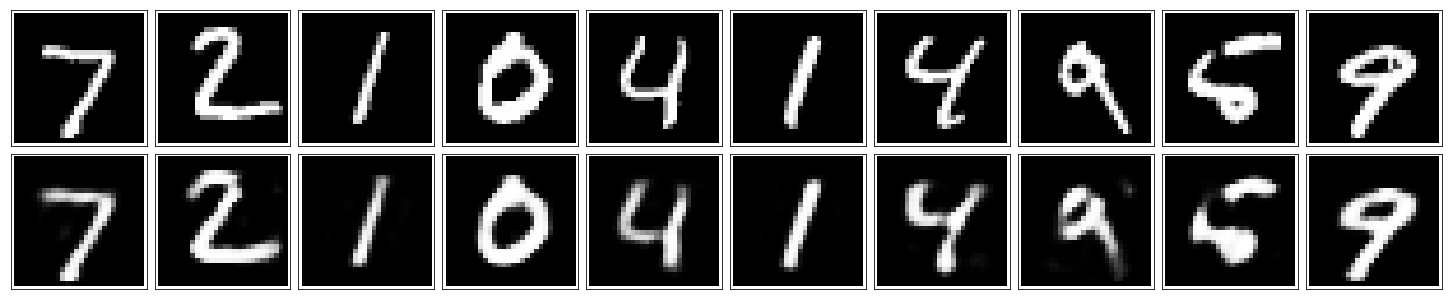

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [12]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.